In [6]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
from collections import namedtuple

from Plot_tools import *
from File_tools import *

import pickle

_nthreads = 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
w_thresh = 5.0
cref_thresh = 35.
percent = (75,90,95)

# FV3 #######
in_dir  = "/scratch/larissa.reames/ideal_updrafts"
out_dir = "/work/wicker/CAM_analysis_tools"
shear   = "shallow_12.5"

fv3_c1500  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_SOLO_C1500_kess", shear)), model_type='fv3_raw', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)
fv3_c2000  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_SOLO_C2000_kess", shear)), model_type='fv3_raw', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)
fv3_c2000_cp  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_SOLO_C2000_kess_cp", shear)), model_type='fv3_raw', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)
fv3_c2500  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_SOLO_C2500_kess", shear)), model_type='fv3_raw', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)
fv3_c3000  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_SOLO_C3000_kess", shear)), model_type='fv3_raw', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)
fv3_c3500  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_SOLO_C3500_kess", shear)), model_type='fv3_raw', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)
fv3_c3500_cp  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_SOLO_C3500_kess_cp", shear)), model_type='fv3_raw', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)

with open('fv3_kess.pkl', 'wb') as f:
    pickle.dump(dict(fv3_c1500=fv3_c1500, fv3_c2000=fv3_c2000, fv3_c2500=fv3_c2500, fv3_c3000=fv3_c3000, fv3_c3500=fv3_c3500, fv3_c2000_cp=fv3_c2000_cp, fv3_c3500_cp=fv3_c3500_cp), f)

# # CM1 #######

input_dir  = '/scratch/wicker/cm1r20.3/run'
output_dir = './'

cm1_c1500 = generate_ideal_profiles(str(os.path.join(input_dir, 'squall_c1500_kess')), model_type='cm1', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)
cm1_c2000 = generate_ideal_profiles(str(os.path.join(input_dir, 'squall_c2000_kess')), model_type='cm1', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)
cm1_c2000_eq1 = generate_ideal_profiles(str(os.path.join(input_dir, 'squall_c2000_kess_eq1')), model_type='cm1', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)
cm1_c2500 = generate_ideal_profiles(str(os.path.join(input_dir, 'squall_c2500_kess')), model_type='cm1', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)
cm1_c3000 = generate_ideal_profiles(str(os.path.join(input_dir, 'squall_c3000_kess')), model_type='cm1', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)
cm1_c3500_eq1 = generate_ideal_profiles(str(os.path.join(input_dir, 'squall_c3500_kess_eq1')), model_type='cm1', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)
cm1_c3500 = generate_ideal_profiles(str(os.path.join(input_dir, 'squall_c3500_kess')), model_type='cm1', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)

with open('cm1_kess.pkl', 'wb') as f:
    pickle.dump(dict(cm1_c1500=cm1_c1500, cm1_c2000=cm1_c2000, cm1_c2500=cm1_c2500, cm1_c3000=cm1_c3000, cm1_c3500=cm1_c3500, cm1_c2000_eq1=cm1_c2000_eq1, cm1_c3500_eq1=cm1_c3500_eq1), f)

# # WRF ######

in_dir  = "/scratch/wicker/ideal_updrafts"
out_dir = "/work/wicker/CAM_analysis_tools"
shear   = "shallow_12.5"

wrf_c1500  = generate_ideal_profiles(str(os.path.join(in_dir, "WRF_C1500_kess", shear)), model_type='wrf', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)
wrf_c2000  = generate_ideal_profiles(str(os.path.join(in_dir, "WRF_C2000_kess", shear)), model_type='wrf', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)
wrf_c2500  = generate_ideal_profiles(str(os.path.join(in_dir, "WRF_C2500_kess", shear)), model_type='wrf', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)
wrf_c3000  = generate_ideal_profiles(str(os.path.join(in_dir, "WRF_C3000_kess", shear)), model_type='wrf', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)
wrf_c3500  = generate_ideal_profiles(str(os.path.join(in_dir, "WRF_C3500_kess", shear)), model_type='wrf', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent, compDBZ=True)

with open('wrf_kess.pkl', 'wb') as f:
     pickle.dump(dict(wrf_c1500=wrf_c1500, wrf_c2000=wrf_c2000, wrf_c2500=wrf_c2500, wrf_c3000=wrf_c3000, wrf_c3500=wrf_c3500), f)


processing model run:  /scratch/larissa.reames/ideal_updrafts/FV3_SOLO_C1500_kess/shallow_12.5 

(60, 471)

 Number of selected updraft profiles:  471 
 Number of labeled objects:  494

Percentile value:  75.000000

Percentile value:  90.000000

Percentile value:  95.000000

processing model run:  /scratch/larissa.reames/ideal_updrafts/FV3_SOLO_C2000_kess/shallow_12.5 

(60, 673)

 Number of selected updraft profiles:  673 
 Number of labeled objects:  696

Percentile value:  75.000000

Percentile value:  90.000000

Percentile value:  95.000000

processing model run:  /scratch/larissa.reames/ideal_updrafts/FV3_SOLO_C2000_kess_cp/shallow_12.5 

(60, 341)

 Number of selected updraft profiles:  341 
 Number of labeled objects:  364

Percentile value:  75.000000

Percentile value:  90.000000

Percentile value:  95.000000

processing model run:  /scratch/larissa.reames/ideal_updrafts/FV3_SOLO_C2500_kess/shallow_12.5 

(60, 896)

 Number of selected updraft profiles:  896 
 Number of labele

In [20]:
# Just read stuff back in...
            
cm1 = pickle2Obj('cm1_kess.pkl')
wrf = pickle2Obj('wrf_kess.pkl')
fv3 = pickle2Obj('fv3_kess.pkl')


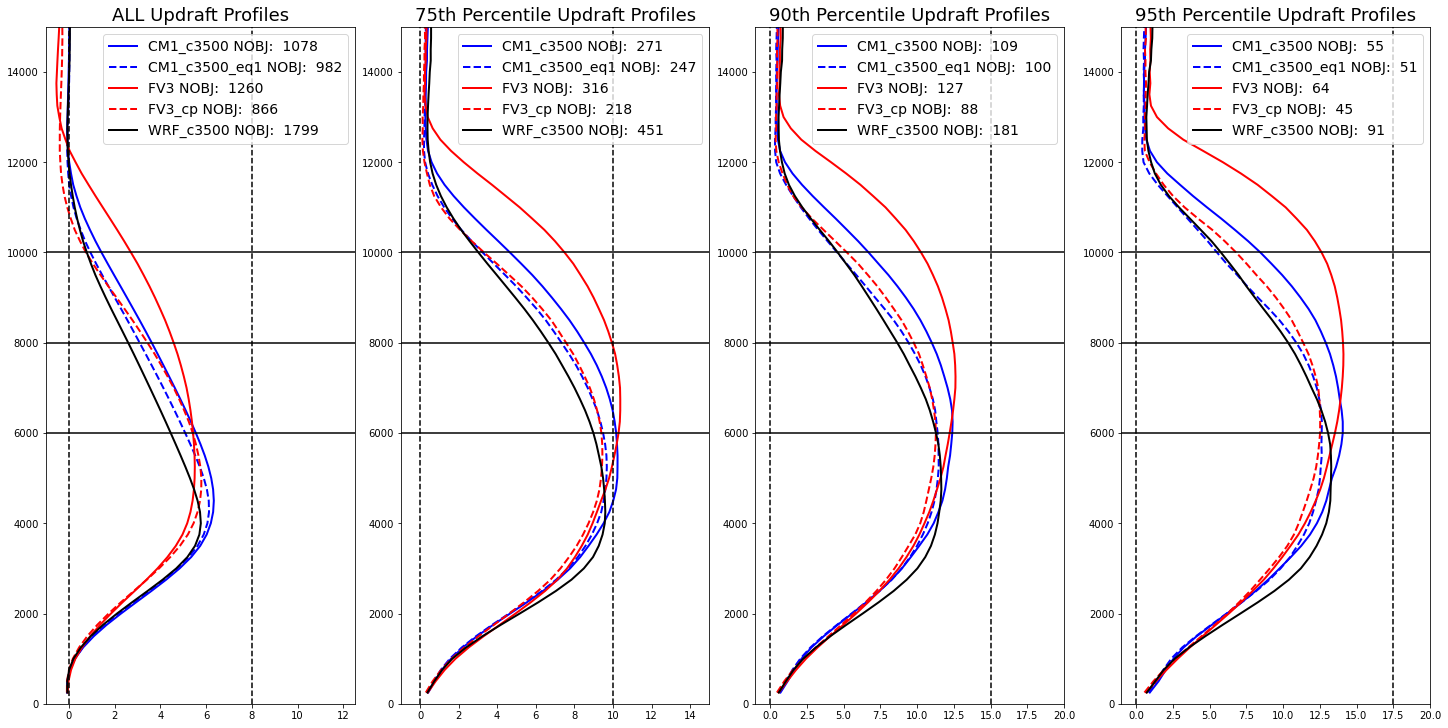

In [21]:
#--------------------------------------------------------------------------------------------
def plot_wprofile(profile, zhgts, percentile, ax, color, mlabel, linewidth=2.0, linestyle='solid'):

    label = "%s NOBJ:  %d" % (mlabel, profile[percentile].shape[1])
    
    ax.plot(profile[percentile].mean(axis=1), zhgts, color=color, linewidth=linewidth, label=label, linestyle=linestyle)
#--------------------------------------------------------------------------------------------
# main

titles = ["ALL Updraft Profiles", "75th Percentile Updraft Profiles", "90th Percentile Updraft Profiles", "95th Percentile Updraft Profiles"]

xvert  = [8.0, 10.0, 15.0, 17.5]
xlim   = [12.5, 15.0, 20.0, 20.0]

zhgts = 250. + 250.*np.arange(60)

fig, ax = plt.subplots(1,4, constrained_layout=True,figsize=(20,10))

for n in np.arange(4):
                   
    plot_wprofile(cm1.cm1_c3500, zhgts, n, ax[n], 'b', 'CM1_c3500')              
    plot_wprofile(cm1.cm1_c3500_eq1, zhgts, n, ax[n], 'b', 'CM1_c3500_eq1', linestyle='dashed')
    plot_wprofile(fv3.fv3_c3500, zhgts, n, ax[n], 'r',    'FV3')
    plot_wprofile(fv3.fv3_c3500_cp, zhgts, n, ax[n], 'r', 'FV3_cp', linestyle='dashed')
    plot_wprofile(wrf.wrf_c3500, zhgts, n, ax[n], 'k', 'WRF_c3500')
    
    ax[n].set_title("%s" % titles[n], fontsize=18)
    ax[n].axhline(y=6000., color='k', linestyle='-')
    ax[n].axhline(y=8000., color='k', linestyle='-')
    ax[n].axhline(y=10000., color='k', linestyle='-')
    ax[n].axvline(x=0.0, color='k', linestyle='--')
    ax[n].axvline(x=xvert[n], color='k', linestyle='--')

    ax[n].set_ylim(0.0,15000.)
    ax[n].set_xlim(-1.0,xlim[n])
    ax[n].legend(fontsize=14)


plt.show()

In [ ]:

    
titles = ["ALL Updraft Profiles", "75th Percentile Updraft Profiles", "90th Percentile Updraft Profiles", "95th Percentile Updraft Profiles"]

xvert  = [8.0, 10.0, 15.0, 17.5]
xlim   = [12.5, 15.0, 20.0, 20.0]

for n in np.arange(len(wrf_q11)):
                   
    fig, ax = plt.subplots(1,3, constrained_layout=True,figsize=(20,10))

    # WRF
    
    plot_wprofile(wrf_q11, zhgts, n, ax[0], 'y', 'WRF_Q11')
    plot_wprofile(wrf_q12, zhgts, n, ax[0], 'c', 'WRF_Q12')
    plot_wprofile(wrf_q13, zhgts, n, ax[0], 'g', 'WRF_Q13')
    plot_wprofile(wrf_q14, zhgts, n, ax[0], 'k', 'WRF_Q14')
    plot_wprofile(wrf_q15, zhgts, n, ax[0], 'r', 'WRF_Q15')
    plot_wprofile(wrf_q16, zhgts, n, ax[0], 'b', 'WRF_Q16')
    ax[0].set_title("WRF %s" % titles[n], fontsize=18)
    ax[0].axhline(y=6000., color='k', linestyle='-')
    ax[0].axhline(y=8000., color='k', linestyle='-')
    ax[0].axhline(y=10000., color='k', linestyle='-')
    ax[0].axvline(x=xvert[n], color='k', linestyle='--')
    ax[0].set_ylim(0.0,15000.)
    ax[0].set_xlim(-1.0,xlim[n])
    ax[0].legend(fontsize=14)

    # FV3

    plot_wprofile(fv3_q11, zhgts, n, ax[1], 'y', 'FV3_Q11')
    plot_wprofile(fv3_q12, zhgts, n, ax[1], 'c', 'FV3_Q12')
    plot_wprofile(fv3_q13, zhgts, n, ax[1], 'g', 'FV3_Q13')
    plot_wprofile(fv3_q14, zhgts, n, ax[1], 'k', 'FV3_Q14')
    plot_wprofile(fv3_q15, zhgts, n, ax[1], 'r', 'FV3_Q15')
    plot_wprofile(fv3_q16, zhgts, n, ax[1], 'b', 'FV3_Q16')
    ax[1].set_title("FV3 %s" % titles[n], fontsize=18)
    ax[1].axhline(y=6000., color='k', linestyle='-')
    ax[1].axhline(y=8000., color='k', linestyle='-')
    ax[1].axhline(y=10000., color='k', linestyle='-')
    ax[1].axvline(x=xvert[n], color='k', linestyle='--')
    
    ax[1].set_ylim(0.0,15000.)
    ax[1].set_xlim(-1.0,xlim[n])
    ax[1].legend(fontsize=14)

    # CM1

    plot_wprofile(cm1_q11, zhgts, n, ax[2], 'y', 'CM1_Q11')
    plot_wprofile(cm1_q12, zhgts, n, ax[2], 'c', 'CM1_Q12')
    plot_wprofile(cm1_q13, zhgts, n, ax[2], 'g', 'CM1_Q13')
    plot_wprofile(cm1_q14, zhgts, n, ax[2], 'k', 'CM1_Q14')
    plot_wprofile(cm1_q15, zhgts, n, ax[2], 'r', 'CM1_Q15')
    plot_wprofile(cm1_q16, zhgts, n, ax[2], 'b', 'CM1_Q16')
    ax[2].set_title("CM1 %s" % titles[n], fontsize=18)
    ax[2].axhline(y=6000., color='k', linestyle='-')
    ax[2].axhline(y=8000., color='k', linestyle='-')
    ax[2].axhline(y=10000., color='k', linestyle='-')
    ax[2].axvline(x=xvert[n], color='k', linestyle='--')

    ax[2].set_ylim(0.0,15000.)
    ax[2].set_xlim(-1.0,xlim[n])
    ax[2].legend(fontsize=14)


    plt.show()

In [ ]:
w_thresh = 5.0
cref_thresh = 45.
percent = (75,90,95)

# FV3 #######
in_dir  = "/scratch/larissa.reames/ideal_updrafts"
out_dir = "/work/wicker/CAM_analysis_tools"
shear   = "shallow_12.5"

wrf_qv14_thomp  = generate_ideal_profiles(str(os.path.join(in_dir, "WRF_km4_dt15_thomp", shear)), model_type='wrf', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)


fv3_qv14_thomp  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_qv14_thomp", shear)), model_type='fv3', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)
fv3_qv14_thomp_ttend  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_qv14_thomp_ttend", shear)), model_type='fv3', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)

In [ ]:
# # WRF ######

in_dir  = "/scratch/larissa.reames/ideal_updrafts"
out_dir = "/work/wicker/CAM_analysis_tools"
shear   = "shallow_12.5"

wrf_q14_nssl  = generate_ideal_profiles(str(os.path.join(in_dir, "WRF_qv14", shear)), model_type='wrf', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)

# FV3 #######
in_dir  = "/scratch/larissa.reames/ideal_updrafts"
out_dir = "/work/wicker/CAM_analysis_tools"
shear   = "shallow_12.5"

# fv3_q14  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_qv14", shear)), model_type='fv3', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)
# fv3_q15  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_qv15", shear)), model_type='fv3', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)
# fv3_q16  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_qv16", shear)), model_type='fv3', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)

In [ ]:
def plot_wprofile(profile, zhgts, percentile, ax, color, mlabel, linewidth=2.0):

    label = "%s NOBJ:  %d" % (mlabel, profile[percentile].shape[1])
    
    ax.plot(profile[percentile].mean(axis=1), zhgts, color=color, linewidth=linewidth, label=label)
    
titles = ["ALL Updraft Profiles", "75th Percentile Updraft Profiles", "90th Percentile Updraft Profiles", "95th Percentile Updraft Profiles"]

xvert  = [8.0, 10.0, 15.0, 17.5]
xlim   = [12.5, 15.0, 20.0, 20.0]

for n in np.arange(len(wrf_qv14_thomp)):
                   
    fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(10,10))

    plot_wprofile(wrf_qv14_thomp, zhgts, n, ax, 'k', 'WRF_Q14_Thomp')

    plot_wprofile(fv3_qv14_thomp, zhgts, n, ax, 'r', 'FV3_Q14_Thomp')
#plot_wprofile(fv3_qv14_thomp_ttend, zhgts, n, ax, 'c', 'FV3_Q14_Thomp_TTEND')
    ax.set_title("Thompson Runs %s" % titles[n], fontsize=18)
    ax.axhline(y=6000., color='k', linestyle='-')
    ax.axhline(y=8000., color='k', linestyle='-')
    ax.axhline(y=10000., color='k', linestyle='-')
    ax.axvline(x=xvert[n], color='k', linestyle='--')
    
    ax.set_ylim(0.0,15000.)
    ax.set_xlim(-1.0,xlim[n])
    ax.legend(fontsize=14)

In [ ]:
w_thresh = 5.0
cref_thresh = 45.
percent = (75,90,95)

# FV3 #######
in_dir  = "/scratch/larissa.reames/ideal_updrafts"
out_dir = "/work/wicker/CAM_analysis_tools"
shear   = "shallow_12.5"

wrf_qv14_thomp  = generate_ideal_profiles(str(os.path.join(in_dir, "WRF_km4_dt15_thomp", shear)), model_type='wrf', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)

fv3_qv14_thomp  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_qv14_thomp", shear)), model_type='fv3', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)

fv3_qv14_gfdl  = generate_ideal_profiles(str(os.path.join(in_dir, "FV3_dt20_hord6_gfdl", shear)), model_type='fv3', w_thresh = w_thresh, cref_thresh = cref_thresh, percentiles=percent)

In [ ]:
def plot_wprofile(profile, zhgts, percentile, ax, color, mlabel, linewidth=2.0):

    label = "%s NOBJ:  %d" % (mlabel, profile[percentile].shape[1])
    
    ax.plot(profile[percentile].mean(axis=1), zhgts, color=color, linewidth=linewidth, label=label)
    
titles = ["ALL Updraft Profiles", "75th Percentile Updraft Profiles", "90th Percentile Updraft Profiles", "95th Percentile Updraft Profiles"]

xvert  = [8.0, 10.0, 15.0, 17.5]
xlim   = [12.5, 15.0, 20.0, 20.0]

for n in np.arange(len(wrf_qv14_thomp)):
                   
    fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(10,10))

    plot_wprofile(wrf_qv14_thomp, zhgts, n, ax, 'k', 'WRF_Q14_Thomp')

    plot_wprofile(fv3_qv14_thomp, zhgts, n, ax, 'r', 'FV3_Q14_Thomp')

    plot_wprofile(fv3_qv14_gfdl, zhgts, n, ax, 'c', 'FV3_Q14_GFDL')
    ax.set_title("Thompson + GFDL Microphysics Runs %s" % titles[n], fontsize=18)
    ax.axhline(y=6000., color='k', linestyle='-')
    ax.axhline(y=8000., color='k', linestyle='-')
    ax.axhline(y=10000., color='k', linestyle='-')
    ax.axvline(x=xvert[n], color='k', linestyle='--')
    
    ax.set_ylim(0.0,15000.)
    ax.set_xlim(-1.0,xlim[n])
    ax.legend(fontsize=14)